In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import simpson
from scipy.signal import savgol_filter
import mplcursors



#### DATA

In [2]:
CSA_gain=10**12#V/C
Biased_voltage=400#V
en_mobility=1000#cm**2/(V*s)
hole_mobility=1000#cm**2/(V*s)
ml_en=1/1000#cm**2/v                               mobility lifetime product of electron
ml_holes=1/10000#cm**2/Vs                     mobility lifetime product of holes
d=4/10#cm                                thickness of the detector
hole_charge= 1.602e-19#C
electron_charge= 1.602e-19#C
#Assumption 
cf=1*10**-12#F#capacitance of the detector
rf=10**3# load resistance


#### Generation of en-hole pairs in CdTe

In [3]:
Energy_photon=60000#eV
en_hole_gen=4.43#eV
en_hole_pairs=Energy_photon/en_hole_gen

In [4]:
Tot_charge=en_hole_pairs*electron_charge#C
v_max=Tot_charge*CSA_gain#V
print(Tot_charge)

2.1697516930022574e-15


In [5]:
#Generation point to hole collecting electrode
x=1/100#cm
xe=39/100#cm
#Electric field component
Ew=10/4#V/cm

#### Hecht Equation

In [6]:
q_collected_frac=((ml_holes*(Biased_voltage/d))/d)*(1-np.exp(-x/(ml_holes*(Biased_voltage/d))))
q_collected_frac_e=((ml_en*(Biased_voltage/d))/d)*(1-np.exp(-xe/(ml_en*(Biased_voltage/d))))
v_flat=(q_collected_frac*Tot_charge)/cf#V
v_flat_e=(q_collected_frac_e*Tot_charge)/cf#V

q_holes=q_collected_frac*Tot_charge #C
q_e=q_collected_frac_e*Tot_charge #C


v_=q_collected_frac*Tot_charge*CSA_gain#V
v_e=q_collected_frac_e*Tot_charge*CSA_gain#V

print(v_)
print(v_e)
print(q_holes)
print(q_e)

5.161979333173567e-05
0.0017517659832526193
5.161979333173567e-17
1.7517659832526193e-15


#### Drift velocity

In [7]:
v_en= en_mobility*(Biased_voltage/d)#cm/s
v_hole= hole_mobility*(Biased_voltage/d)#cm/s
print(v_en)
print(v_hole)


1000000.0
1000000.0


#### Rise Time

In [8]:
#rise time
th=(x/v_hole)*(10**9)#ns
th_e=(xe/v_en)*(10**9)#ns
print(th)
print(th_e)


10.0
390.0


#### Ramo-Shockley Theorem

2.1136997742663656e-06
5.424379232505643e-09
[5.424379232505643e-09, 5.424379232505643e-09, 5.424379232505643e-09, 5.424379232505643e-09, 5.424379232505643e-09, 5.424379232505643e-09, 5.424379232505643e-09, 5.424379232505643e-09, 5.424379232505643e-09, 5.424379232505643e-09, 5.424379232505643e-09, 5.424379232505643e-09, 5.424379232505643e-09, 5.424379232505643e-09, 5.424379232505643e-09, 5.424379232505643e-09, 5.424379232505643e-09, 5.424379232505643e-09, 5.424379232505643e-09, 5.424379232505643e-09, 5.424379232505643e-09, 5.424379232505643e-09, 5.424379232505643e-09, 5.424379232505643e-09, 5.424379232505643e-09, 5.424379232505643e-09, 5.424379232505643e-09, 5.424379232505643e-09, 5.424379232505643e-09, 5.424379232505643e-09, 5.424379232505643e-09, 5.424379232505643e-09, 5.424379232505643e-09, 5.424379232505643e-09, 5.424379232505643e-09, 5.424379232505643e-09, 5.424379232505643e-09, 5.424379232505643e-09, 5.424379232505643e-09, 5.424379232505643e-09, 5.424379232505643e-09, 5.424379232

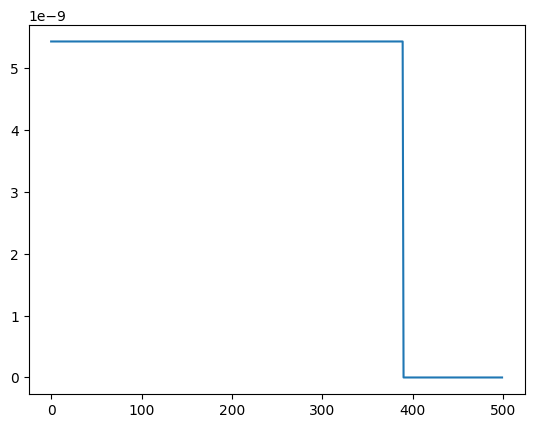

In [9]:
#Calculating Current
i_t= (en_hole_pairs*(hole_charge*v_hole))/d#A
time=np.arange(0,500,1)#ns
i_arr=[i_t]*390
for i in range(110):
    i_arr.append(0)
integral=simpson(i_arr,time)
print(integral)
print(i_t)
print(i_arr)
plt.plot(time,i_arr)
plt.show()

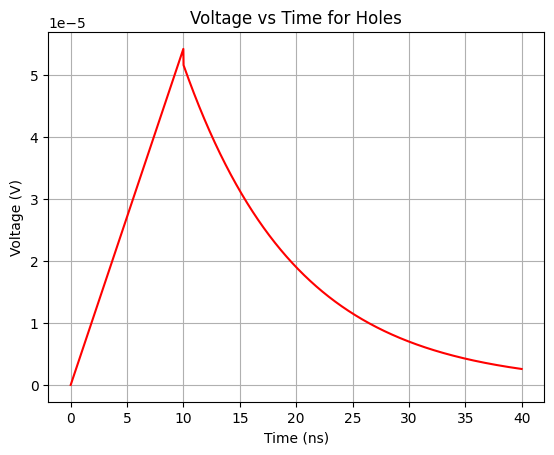

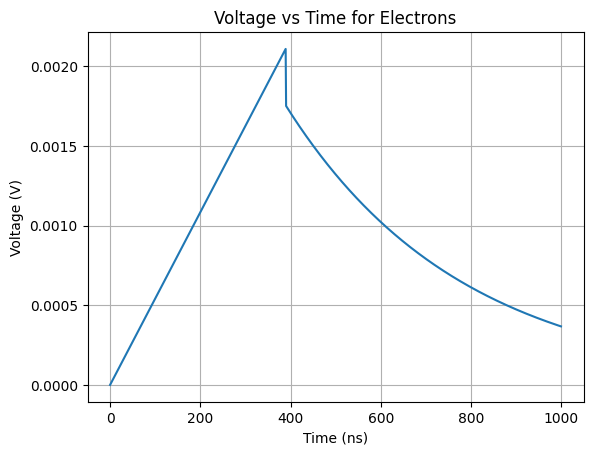

In [24]:
#Integrating the current to get the voltage
time=np.arange(0,40,0.01)#ns

v_t=[]
for t in time:
    if t==0:
        v=0
        v_t.append(v)
    elif t< th:
        t_=np.arange(0,t+0.01,0.01)
        n=len(t_)
        imp=[i_t]*n
        v=simpson(imp,t_)/(cf*(10**9))
        v_t.append(v)
    elif t==th:
        v_t.append(v_)
    else:
        v_x=v_*np.exp(-((t-th)/th))
        v_t.append(v_x)

time_e=np.arange(0,1000,1)#ns
v_t_e=[]
for t in time_e:
    if t==0:
        v=0
        v_t_e.append(v)
    elif t< th_e:
        t_=np.arange(0,t+1,1)
        n=len(t_)
        imp=[i_t]*n
        v=simpson(imp,t_)/(cf*(10**9))
        v_t_e.append(v)
    elif t==th_e:
        v_t_e.append(v_e)
    else:
        v_x=v_e*np.exp(-((t-th_e)/th_e))
        v_t_e.append(v_x)




v_t_smooth = savgol_filter(v_t, window_length=3, polyorder=2)
v_t_e_smooth = savgol_filter(v_t_e, window_length=3, polyorder=2)

plt.grid()
plt.plot(time,v_t_smooth, color='red')
plt.title("Voltage vs Time for Holes")
plt.xlabel("Time (ns)")
plt.ylabel("Voltage (V)")
plt.show()
plt.grid()
plt.plot(time_e,v_t_e_smooth)
plt.title("Voltage vs Time for Electrons")
plt.xlabel("Time (ns)")
plt.ylabel("Voltage (V)")
plt.show()
cursor = mplcursors.cursor(hover=True)
cursor.connect("add", lambda sel: sel.annotation.set_text(f"x={sel.target[0]:.2f}, y={sel.target[1]:.2f}"))
plt.show()



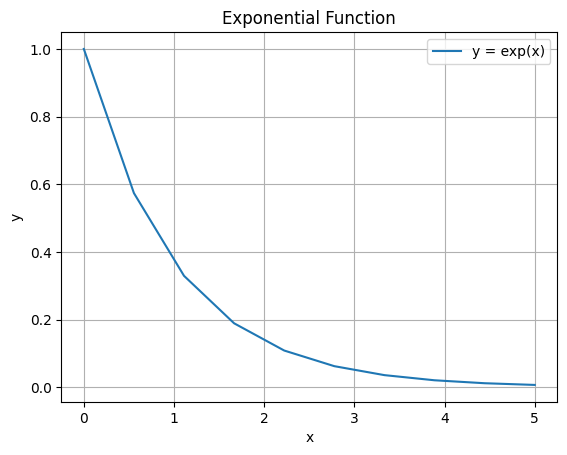

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the x values (e.g., from 0 to 5 with small steps)
x = np.linspace(0, 5, 10)

# Calculate the exponential values
y = np.exp(-x)

# Plot the exponential function
plt.plot(x, y, label="y = exp(x)")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Exponential Function")
plt.grid()
plt.legend()
plt.show()